In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
from collections import Counter
from nltk.tokenize import word_tokenize 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

In [5]:
warnings.filterwarnings('ignore')
df  = pd.read_csv('data.csv') #Read data

In [6]:
df.isna().sum()


id       0
label    0
tweet    0
dtype: int64

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
df.drop('id',axis = 1,inplace = True) #Drop id column

In [10]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [11]:
df.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

# Data Cleaning

In [12]:
df["tweets"] = df["tweet"].str.replace('[^\w\s]', '') #Begin cleaning by replacing all non-words with space


In [13]:
df

,label,tweet,tweets
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalised in in calgary wso ...


In [14]:
df.drop('tweet',axis = 1,inplace = True) #Drop 'tweet' column

In [15]:
pd.set_option('display.max_colwidth', -1)


In [16]:
df

,label,tweets
0,0,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,0,user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð ðððð ððð
4,0,factsguide society now motivation
...,...,...
31957,0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher
31959,0,listening to sad songs on a monday morning otw to work is sad
31960,1,user sikh temple vandalised in in calgary wso condemns act


In [17]:
#Further cleaning
def clean(text):
  #Replace all digits with space
  text = re.sub(r"[\d-]",'',text)
  # Remove Unicode characters
  text = re.sub(r'[^\x00-\x7F]+', '',text)
  #Remove retweets
  text = re.sub('user', '', text)
  # Remove urls
  text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
  text = re.sub("[^a-zA-Z]", ' ',text)
  # Remove mentions:
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  return text

df.tweets = df.tweets.apply(clean)

In [18]:
df.head()

,label,tweets
0,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,0,thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from wordcloud import WordCloud

# Tokenize Tweets

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ReDI_NRW_765\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
tokenized_tweet = df["tweets"].apply(lambda x: word_tokenize(x))

In [20]:
tokenized_tweet[:5]

0    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]          
1    [thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]
2    [bihday, your, majesty]                                                                                                
3    [model, i, love, u, take, with, u, all, the, time, in, ur]                                                             
4    [factsguide, society, now, motivation]                                                                                 
Name: tweets, dtype: object

In [21]:
df['tokenized'] = tokenized_tweet

# Lemmatize Tweets

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
test = df['tokenized'][0]
test

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 'run']

In [31]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ReDI_NRW_765\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ReDI_NRW_765\AppData\Roaming\nltk_data...


True

In [32]:

def lemma(text_list):
  lemmas = []
  for item in text_list:
    lemma = WordNetLemmatizer().lemmatize(item)
    lemmas.append(lemma)
   
  return lemmas
    


In [33]:
lemmatized_tweet = df["tokenized"].apply(lambda x: lemma(x))

In [34]:
df['lemmatized'] = lemmatized_tweet

In [35]:
df['lemmatized']

0        [when, a, father, is, dysfunctional, and, is, so, selfish, he, drag, his, kid, into, his, dysfunction, run]                                          
1        [thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, van, in, pdx, disapointed, getthanked]                               
2        [bihday, your, majesty]                                                                                                                              
3        [model, i, love, u, take, with, u, all, the, time, in, ur]                                                                                           
4        [factsguide, society, now, motivation]                                                                                                               
                          ...                                                                                                                                 
31957    [ate, isz, that, youuu]              

# Remove Stop Words

In [36]:
from nltk.corpus import stopwords


In [37]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ReDI_NRW_765\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [39]:
df['lemmatized'] = df['lemmatized'].apply(lambda x: [item for item in x if item not in stop_words])

In [40]:
df.head()

,label,tweets,tokenized,lemmatized
0,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,"[when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]","[father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,0,thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx disapointed getthanked,"[thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]","[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,0,model i love u take with u all the time in ur,"[model, i, love, u, take, with, u, all, the, time, in, ur]","[model, love, u, take, u, time, ur]"
4,0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


In [41]:
df.isna().sum()


label         0
tweets        0
tokenized     0
lemmatized    0
dtype: int64

In [42]:
df = df.drop(["tweets", "tokenized"], axis = 1)
df.head()

,label,lemmatized
0,0,"[father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"


In [43]:
df.lemmatized[0]


['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run']

In [44]:
" ".join(df.lemmatized[0])
  

'father dysfunctional selfish drag kid dysfunction run'

In [45]:
def join_words(list_words):  #Detokenize tweets to be compatible with model
  return " ".join(list_words)


df['sentences'] = df.lemmatized.apply(join_words)

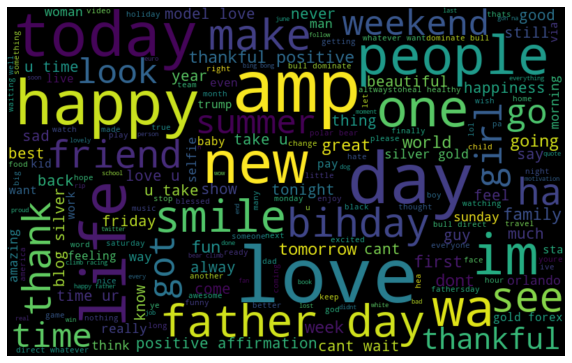

In [46]:
all_words = ' '.join([text for text in df['sentences']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


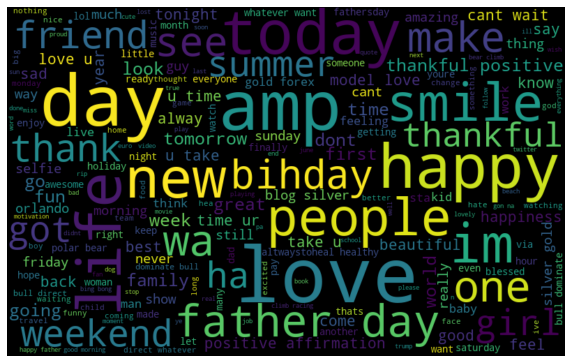

In [47]:
neutral_words =' '.join([text for text in df['sentences'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

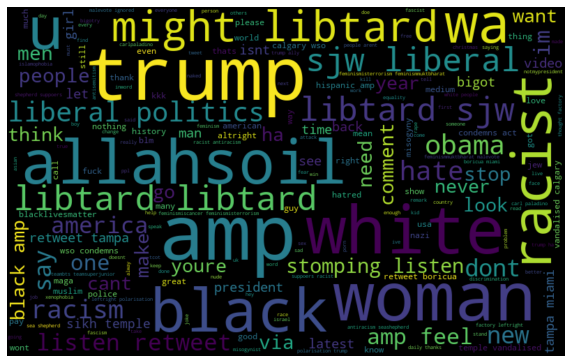

In [48]:
negative_words = ' '.join([text for text in df['sentences'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
df.head()

,label,lemmatized,sentences
0,0,"[father, dysfunctional, selfish, drag, kid, dysfunction, run]",father dysfunctional selfish drag kid dysfunction run
1,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]",thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked
2,0,"[bihday, majesty]",bihday majesty
3,0,"[model, love, u, take, u, time, ur]",model love u take u time ur
4,0,"[factsguide, society, motivation]",factsguide society motivation


In [56]:
df.shape

(31962, 3)

# Vectorize Tweets

In [58]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(df['sentences'])
X = vectorizer.transform(df['sentences'])

In [50]:
y = df["label"]

## Split Dataset into Training and Test Sets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [65]:
X_train.shape

(22373, 1000)

# Build Model

In [70]:
clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
print(confusion_matrix(y_test,y_pred)) #performance measurement
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")

[[2982   27]
 [  99   89]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3009
           1       0.77      0.47      0.59       188

    accuracy                           0.96      3197
   macro avg       0.87      0.73      0.78      3197
weighted avg       0.96      0.96      0.96      3197

Accuracy: 96.0588051298092 %


In [80]:
#plot_confusion_matrix(clf,X_test,y_test)

In [74]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

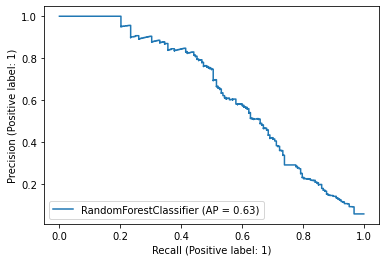

In [75]:
plot_precision_recall_curve(clf,X_test,y_test)

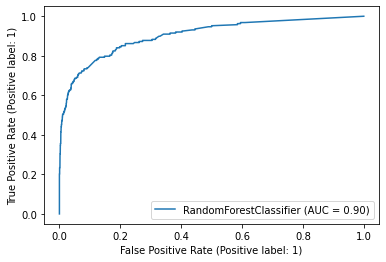

In [77]:
plot_roc_curve(clf,X_test,y_test)

In [ ]:
import joblib

In [ ]:
filename = "Completed_model.joblib"
joblib.dump(clf, filename)